# <span style='color:red'> Predicción del consumo eléctrico de un edificio usando Scikit-learn.   </span>

Usa datasets de Edificios de varios paises distribuidos por zonas e Industria
Timezone_data= {'America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Euope/Zurich','Asia/Singapore','America/Denver'}
Industry_data={'Education','Government','Commercial Property'}
Usa datasets de clima/temperatuda con datos de humedad, temperatura por tiempo 
Usa varios datasets, hace Datacleaning, mezcla los datasets. 

Al ejecutar pide que se introduzca manualmente dos valores: uno de zona y otro de Industria para que vaya a elegir el dataset correspondiente. 

Uno es la zona: America/Chicago  presionar enter  como ejemplo introducir asi mismo America/Chicago 
El otro valor es Industria= introducir Education Enter  u otro valor de la lista de arriba.

La ejecución de la notebook se detiene esperando que se ingresen ambos datos



Orlando Chaparro.
github: https://github.com/orlandochr/prediccion_consumo_electrico_edificios

Material del Curso:
Predict electricity consumption in Python using Scikit-Learn
ofrecido por Coursera Project Network
Instructor
Mohanad Ayman Affify
Engineer
Data Science

https://www.coursera.org/projects/predict-electricity-consumption 

# <span style='color:Blue'> importar  las librerias y funciones.   </span>

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

 
# <span style='color:blue'> Importar el dataset de Edificios basado en localización geográfica y uso de forma interactiva</span>

## <span style='color:blue'>  Importar archivo metadata    </span>
metadata en archivo meta_open.csv - Importado con panda  

In [2]:
#importar el archivo metadata

# Si queres bajar el dataset : http://www.proyectoucom.orlychaparro.com/electric/dataset/Electric_dataset.zip
#Si no queres bajar esta ahora online apuntando a un hosting mio

# Si bajaste los datasets en una carpeta local llamada data en el mismo directorio de la jupyter_notebook
#descomentar este  data_url y cometar el otro 
# data_url = 'data/meta_open.csv'


# Si vas a usar los datasets online sin necesidad de bajar, si no comentar este data url.  
data_url = 'http://proyectoucom.orlychaparro.com/electric/meta_open.csv'

# Aqui carga el dataset segun el data_url 
metadata = pd.read_csv(data_url)




In [3]:
#test 
metadata.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.0,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.0,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.0,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.0,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.0,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv


## <span style='color:blue'> Import data de Edificios </span>

Importamos data de edificios basados en Zona e industria
Zona : America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Euope/Zurich','Asia/Singapore','America/Denver'}

Industria : {'Education','Government','Commercial Property'}

Para el ejemplo ingresar: timezone: America/Chicago
Para industria ingresar : Education

In [4]:
#creating a list of all possible timezones and industries  in order to validate the user input
Timezone_data={'America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Euope/Zurich','Asia/Singapore','America/Denver'}
Industry_data={'Education','Government','Commercial Property'}

In [5]:
#Toma el valor zona ingresado por el usuario
while True:
    Timezone=str(input("Favor Ingresar Zona"))
    if Timezone not in Timezone_data:
        print("This an invalid ans")
        continue
    else:
        break

Favor Ingresar ZonaAmerica/Chicago


In [6]:
#Toma el valor Industria ingresado por el usuario
while True:
    Industry=str(input("Favor ingresar Industria"))
    if Industry not in Industry_data:
        print("This an invalid ans")
        continue
    else:
        break
              

Favor ingresar IndustriaEducation


In [7]:
# Filtrar el dato por Zoa e industria ingresados
filtered_metadata=metadata.loc[(metadata['timezone']==Timezone)&(metadata['industry']==Industry)]
#Cargar los datos filtrados 
filtered_metadata[['uid','newweatherfilename']]

,uid,newweatherfilename
90,Office_Mada,weather3.csv
91,Office_Madeleine,weather3.csv
92,Office_Madisyn,weather3.csv
93,Office_Malik,weather3.csv
94,Office_Marc,weather3.csv
...,...,...
484,UnivLab_Marie,weather3.csv
485,UnivLab_Mario,weather3.csv
486,UnivLab_Marshall,weather3.csv
487,UnivLab_Miles,weather3.csv


## <span style='color:blue'> Cargar los archivos correspondientes  </span>

In [8]:

#Guarda el nombre del archivo a building_file  
building_file=filtered_metadata['uid'].values[0]+'.csv'
#Carga el dato del primer edificio
building_data=pd.read_csv("data/{}".format(building_file))

# Gaurda dato de Clima/temperatura al nombr de archivo weather_file
weather_file=filtered_metadata['newweatherfilename'].values[0]

# Carga el archivo de datos del Clima/temperatura 
weather_data=pd.read_csv("data/{}".format(weather_file))

#Test: Muestra los primeros 5 registros de los datos de Edificios 
building_data.head()
#Test : Muestra los 5 primeros registros de datos de Clima/temperatura
weather_data.head()


,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [9]:
#Evaluación Visual: edificios
building_data.head()


,timestamp,Office_Mada
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [10]:
#Evaluación Visual: Clime/temperatura 
weather_data.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [11]:
#Evaluación Info building : 

building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8760 non-null   object 
 1   Office_Mada  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [12]:
#Evaluación Info clima/temperatura : 
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810 entries, 0 to 10809
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10810 non-null  object 
 1   Conditions             10810 non-null  object 
 2   DateUTC<br />          10810 non-null  object 
 3   Dew PointC             10810 non-null  float64
 4   Events                 1573 non-null   object 
 5   Gust SpeedKm/h         10810 non-null  object 
 6   Humidity               10809 non-null  float64
 7   Precipitationmm        1968 non-null   float64
 8   Sea Level PressurehPa  10810 non-null  float64
 9   TemperatureC           10810 non-null  float64
 10  TimeCDT                6816 non-null   object 
 11  TimeCST                3994 non-null   object 
 12  VisibilityKm           10810 non-null  float64
 13  Wind Direction         10810 non-null  object 
 14  Wind SpeedKm/h         10810 non-null  object 
 15  Wi

## Problemas de Calidad de datos:
1)el dato de fecha hora no es objeto tipo datetime
2)Hay columnas innecesarias que se deben borrar
3)Hay campos con valores nulos
4)Algunos nombres de columnas no son descriptivas

El tipo de datos de marca de tiempo no es del objeto de fecha y hora 2) Hay columnas no deseadas que deben eliminarse 3) Hay valores nulos 4) Algunos nombres de columna no son descriptivos

## Problemas de ordenamiento de datos:
1)Los dos datasets no estan unificados en un dataset
2)Hay dos columnas de fecha/hora en el archivo de clima/temperatura 

## <span style='color:blue'> Limpieza de datos o Data Cleaning   </span>


In [13]:
# Convertir Campos de fecha a datetime
building_data['timestamp']=pd.to_datetime(building_data['timestamp'])
 #renombrar columnas 
building_data.columns=['timestamp','KWH']

In [14]:
# Convertir Campos de fecha a datetime
weather_data['timestamp']=pd.to_datetime(building_data['timestamp'])

In [15]:
#Borrar columnas innecesarias 
weather_data=weather_data[['timestamp','TemperatureC','Humidity']]


In [16]:

# Se vuelve muestrear los datos de clima antes de fusionar los dos dataframes.
# Setear la columna timestamp como indice
weather_data=weather_data.set_index('timestamp')
 # Muestrar de nuevo el dato por Hora 
weather_data=weather_data.resample('H').mean()

In [17]:

#Se vuelve muestrear los datos de Edificios antes de fusionar los dos dataframes.
# Setear la columna timestamp como indice
building_data=building_data.set_index('timestamp')
# Muestrar de nuevo el dato por Hora
building_data=building_data.resample('H').mean()

In [18]:

# Combinar ambos datasets
building_data_clean=pd.merge(building_data,weather_data,how='left',on ='timestamp')

#llenar valores nulos
building_data_clean=building_data_clean.fillna(method='bfill')
#test
building_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KWH           8760 non-null   float64
 1   TemperatureC  8760 non-null   float64
 2   Humidity      8760 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


# <span style='color:blue'> Normalizar el Dataset  </span>

## <span style='color:blue'> Normalizar el Dataset   </span>
El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos a una escala común. Se requiere cuando las características tienen diferentes rangos.

In [19]:
#Normalizar los datos restando la media de la columna de cada observación y luego dividiendo por la desviación estándar
df_normalized=(building_data_clean-building_data_clean.mean())/building_data_clean.std()

## <span style='color:blue'> Función de revertir etiqueta </span>

Debido a que estamos usando valores normalizados para etiquetas, obtendremos las predicciones en la misma distribución normalizada. Entonces, necesitamos revertir la etiqueta normalizada (KWH) a la distribución original si queremos el consumo de KWH previsto .

In [20]:
y_mean=building_data_clean['KWH'].mean()
y_std=building_data_clean['KWH'].std()

#la función revert_label_value() para revertir la etiqueta normalizada a su distribución original
def revert_label_value(pred):
    return(pred*y_std+y_mean)

# <span style='color:blue'> Crear el Modelo de Entrenamiento y el set de datos de Test  </span>

1) Train set se utiliza en los procesos de aprendizaje para ajustarse a los parámetros. 
<br>
2) Test set es independiente del conjunto de entrenamiento, se considera un conjunto de ejemplos utilizados para evaluar el rendimiento del modelo.
<br>
3) Dataframe label es la etiqueta que queremos predecir. en nuestro caso es el consumo de KWH.
<br>
4) Dataframe features son las características que influyen en nuestra etiqueta. en nuestro caso las características son el día de la semana, hora exacta, temperatura y humedad

## <span style='color:blue'> Dividir el Modelo de entrenamiento y el modelo de Test  </span>

In [21]:
# Crear el train set (Modelo de entrenamiento)  Año 2014
Train_set=df_normalized.truncate(before='2014-01-01', after='2014-12-31')
# Crea the test set (Modelo de Tests)año  2015
Test_set=df_normalized.truncate(before='2014-12-31', after='2015-12-31') 

## <span style='color:blue'> Seleccionar Etiquetas   </span>

In [22]:
#seleccionar Etiqueta (label) para el train set 
Train_label=Train_set['KWH']

#seleccionar Etiqueta (label) para el test set 
Test_label=Test_set['KWH']

## <span style='color:blue'> Seleccionar features o Características </span>

Machine learning requiere que todas las variables de entrada y salida sean numéricas.
<br>
Esto significa que debemos codificar los campos de datetime en númerico antes de poder ajustar y evaluar un modelo.

In [23]:
#Encode train features (características)
x=pd.get_dummies(Train_set.index.hour)
y=pd.get_dummies(Train_set.index.dayofweek)
w=pd.DataFrame(Train_set['TemperatureC'].values)
z=pd.DataFrame(Train_set['Humidity'].values)
Train_features=pd.concat([x,y,w,z],axis=1).dropna()
#Encode test features (características)
x=pd.get_dummies(Test_set.index.hour)
y=pd.get_dummies(Test_set.index.dayofweek)
w=pd.DataFrame(Test_set['TemperatureC'].values)
z=pd.DataFrame(Test_set['Humidity'].values)
Test_features=pd.concat([x,y,w,z],axis=1).dropna()

# <span style='color:blue'> Crear el modelo de Predicción</span>

## <span style='color:blue'> Entrenar el modelo </span>
El algoritmo KNN utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor basado en qué tan parecido a los puntos en el conjunto de entrenamiento

In [24]:

# predecir el consumo de KWH Para el Test set
knnreg=KNeighborsRegressor(n_neighbors=1).fit(np.array(Train_features),np.array(Train_label.values))
predict=knnreg.predict(np.array(Test_features))

In [25]:
#Test
predict

array([-0.53457962, -0.86891681, -0.95250111, ..., -0.32097531,
       -0.6553125 , -0.85962967])

## <span style='color:blue'> Covertir las etiquetas al valor original </span>
Cambiamos las columnas de Test y predicción en los valores originales. 

In [26]:
# Convertir la columna predict a Dataframe
predict=pd.DataFrame(predict,index=Test_set.index)
#Nombrar la columna predict a KWH
predict.columns=['KWH']
#Revertirde vuelta la columna a su valor original
predict=predict['KWH'].apply(lambda x:revert_label_value(x))
#Test
predict
#Revertirde vuelta la columna a su valor original
Test_set['KWH']=Test_set['KWH'].apply(lambda x:revert_label_value(x))
#Test
Test_set['KWH']

timestamp
2014-12-31 00:00:00    58.00
2014-12-31 01:00:00    58.25
2014-12-31 02:00:00    54.25
2014-12-31 03:00:00    55.00
2014-12-31 04:00:00    55.50
                       ...  
2015-04-30 19:00:00    79.50
2015-04-30 20:00:00    57.50
2015-04-30 21:00:00    52.25
2015-04-30 22:00:00    47.25
2015-04-30 23:00:00    41.25
Name: KWH, Length: 2904, dtype: float64

## <span style='color:blue'> Visualizar la predicción </span>
Compararemos entre la etiqueta predicha y la etiqueta del conjunto de prueba para comprobar qué tan bien nuestro modelo predijo la etiqueta de prueba.  

In [27]:
# Fusionar el conjunto de prueba real con el set de Predicciones
Actual_predict=pd.merge(Test_set,predict,how='left',on='timestamp')

#Nombrar las columnas 
Actual_predict.columns=["KWH_Actual","Temperature_actual","Humidity_Actual","KWH_predict"]
#Test
Actual_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2904 entries, 2014-12-31 00:00:00 to 2015-04-30 23:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KWH_Actual          2904 non-null   float64
 1   Temperature_actual  2904 non-null   float64
 2   Humidity_Actual     2904 non-null   float64
 3   KWH_predict         2904 non-null   float64
dtypes: float64(4)
memory usage: 113.4 KB


In [28]:
#Set de Comparación
Actual_predict_plot=Actual_predict[['KWH_Actual','KWH_predict']]

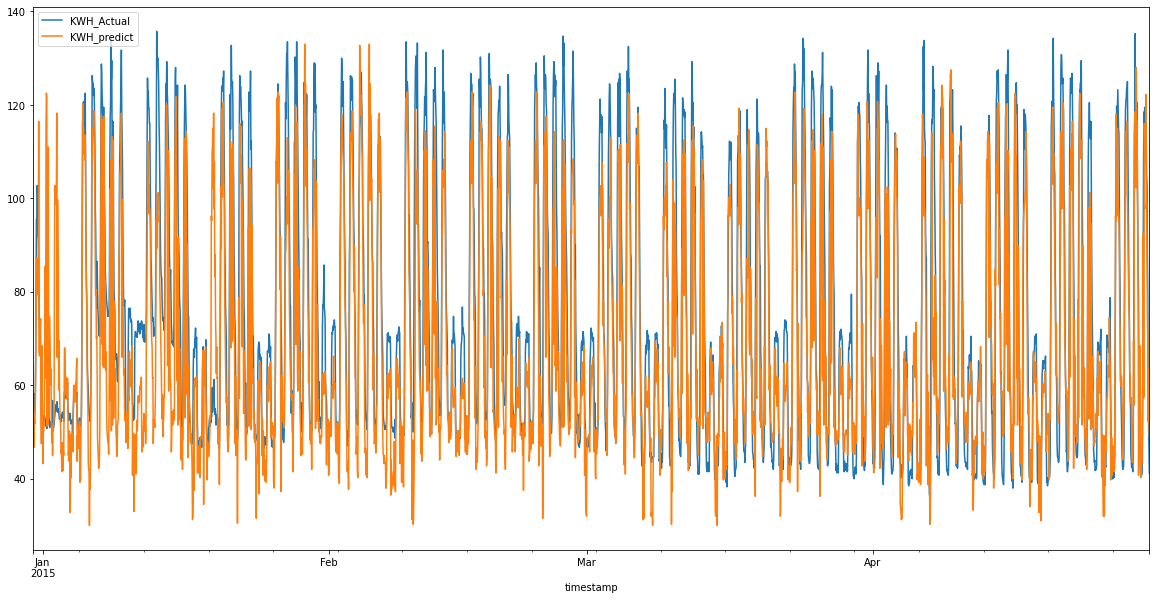

In [29]:
#plot set
Actual_predict_plot.plot(figsize=(20,10))